## Submission :
* Make sure that the notebook runs without errors when cells are run in sequence.
* Write your name and roll number in the cell below.
* Rename the notebook to `<RollNumber>_Q2.ipynb` before submission.

Name: Shaunak Biswas

Roll Number: 2022111024

# Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that projects the data into a lower dimensional space. It does so by finding the directions of maximum variance in high-dimensional data and projecting it onto a smaller dimensional subspace while retaining most of the information.

PCA is done by finding the eigenvectors of the covariance matrix of the data and ordering them by their corresponding eigenvalues in descending order. 

The eigenvectors with the lowest eigenvalues carry the least information about the distribution of the data and hence can be dropped. The eigenvectors with the highest eigenvalues are the ones that contain the most information about the distribution of the data and hence are the ones that we want to keep.




(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

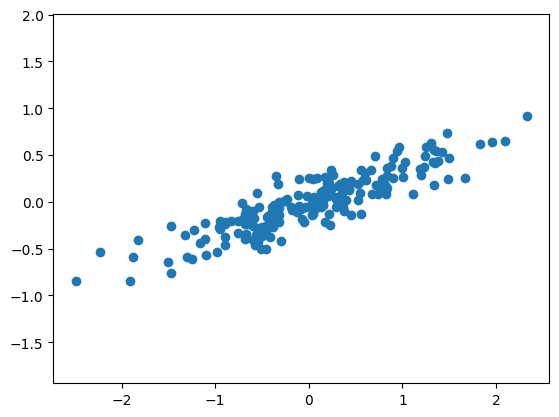

In [14]:
import numpy as np
import matplotlib.pyplot as plt


rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

We observe that most of the variance is along one of the axes. 

In [15]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9497608386363483,
 1.0052301483776815)

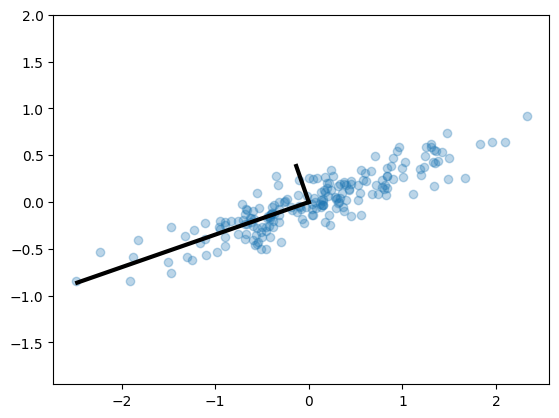

In [16]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal')


These vectors represent the principal components of the data. The eigenvalues are the variance of the data when projected onto that axis.  

In [17]:
X_pca = pca.transform(X)

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 2)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

(-2.7292712056271973,
 2.570274439335262,
 -0.9326181575178755,
 1.0044138302291832)

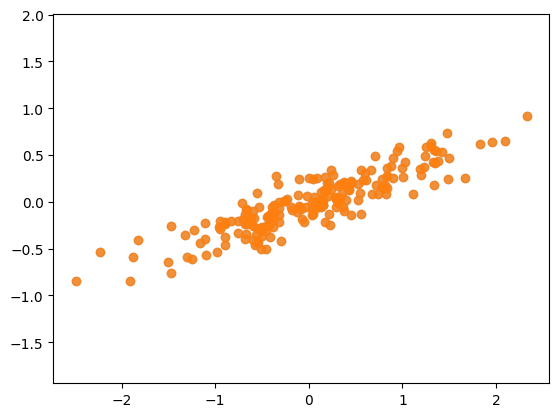

In [18]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

Therefore, with PCA, we can reduce the dimensionality of the data while retaining most of the information. This is useful for data visualization and for reducing the computational complexity of the models in Machine Learning especially when the number of features is very large.

For the assignment, you will be using the digits dataset from sklearn. The dataset consists of 1797 images of handwritten digits. Each image is a 8x8 image which is flattened into a 64-dimensional vector. Therefore, each image is a 64-dimensional vector. Each feature represents the intensity of one pixel. The dataset has 10 classes, one for each digit.

In [19]:
from sklearn.datasets import load_digits
X = load_digits().data
X.shape

(1797, 64)

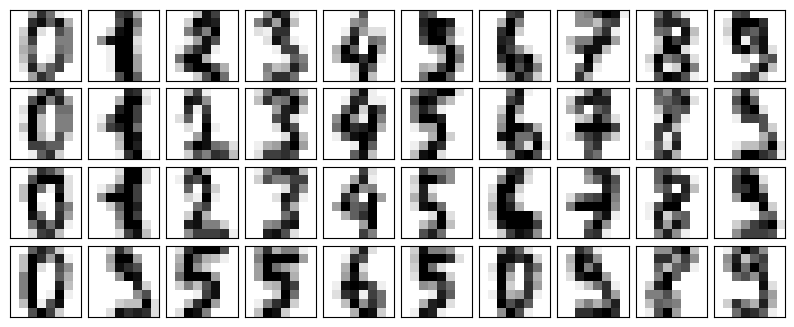

In [20]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))

plot_digits(X)

### Q1. Write a function that returns the eigenvalues and eigenvectors given the data matrix X. Also, write a function that returns the top k principal components given the data matrix X and the number of principal components k. (Do not use PCA from sklearn, you can use any inbuilt function for finding the covariance matrix and the eigenspace, also mean center the data before performing PCA)

In [21]:
def eigenValuesAndVectors(matrix):
    eigenValues, eigenVectors=np.linalg.eig(matrix)
    return eigenValues, eigenVectors

def principalComponents(matrix, k):
    meanCenteredMatrix=matrix-np.mean(matrix)
    covarianceMatrix=np.cov(meanCenteredMatrix, rowvar=False)
    eigenValues, eigenVectors=eigenValuesAndVectors(covarianceMatrix)
    sorted=np.argsort(eigenValues)[::-1]
    eigenValues=eigenValues[sorted]
    eigenVectors=eigenVectors[:,sorted]
    return eigenValues[:k],eigenVectors[:,:k]

### Q2. Plot the percentage of variance vs principal components for the first 10 principal components. Plot the cumulative percentage of variance explained by the principal components. Choose the number of principal components such that 95% of the variance for the digits dataset is retained.

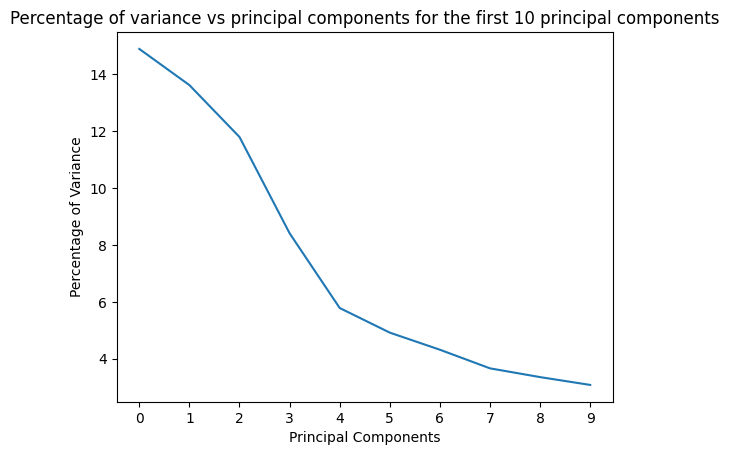

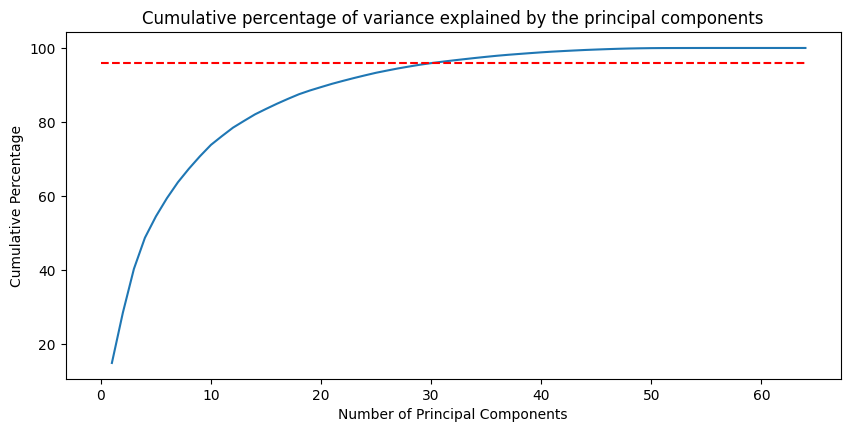

Number of principal components such that 95% of the variance for the digits is retained is: 29


In [22]:
eigenValues, eigenVectors=principalComponents(X, X.shape[1])
eigenValuesSum = np.sum(eigenValues)
explainedVarianceRatio = eigenValues / eigenValuesSum

cumulativeVariance = np.cumsum(explainedVarianceRatio)
plt.plot(range(10), explainedVarianceRatio[:10]*100)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variance')
plt.xticks(range(10))
plt.title('Percentage of variance vs principal components for the first 10 principal components')
plt.show()

plt.figure(figsize=(10,4.5))
plt.plot(range(1, len(cumulativeVariance) + 1), cumulativeVariance*100)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Percentage')
plt.hlines(y=96,xmin=0, xmax=64,colors="red",linestyles="dashed")
plt.title('Cumulative percentage of variance explained by the principal components')
plt.show()

index=np.argmax(cumulativeVariance >= 0.95) + 1 #assumed that we are to preserve ATLEAST 95% of the variance 
print(f"Number of principal components such that 95% of the variance for the digits is retained is: {index}")

### Q3. Write a function to project the data onto the new basis. Transform the data into the new basis. Retain only the top k principal components. (k is chosen as in Q2)

In [23]:
original_data=X
def projectionOntoBasis(X, k):
    eigenValues, topComponents=principalComponents(X,k)
    return X.dot(topComponents)
projected_data=projectionOntoBasis(X, index)
print(projected_data)

[[-9.28679193e-01  1.95546165e+01 -6.93233315e+00 ... -4.15432855e+00
   3.24839806e+00 -2.26081889e+00]
 [ 8.28839856e+00 -2.24889660e+01  6.97022751e+00 ... -2.66622566e+00
   2.81495635e+00  1.18523218e+00]
 [ 7.32271022e+00 -1.16762534e+01  5.48927955e+00 ... -4.71242861e+00
   1.47071868e-01 -2.90359139e-01]
 ...
 [ 1.11320710e+01 -8.68051925e+00  8.13027600e+00 ...  3.08505447e+00
   4.80284718e-01  2.41054192e+00]
 [-4.54131284e+00  1.07036866e+01 -7.64014488e+00 ... -3.73690801e+00
   1.34988742e+00 -2.06727295e+00]
 [-1.36023738e-02  4.64528218e+00  1.33044300e+01 ...  2.53275975e+00
   1.00720193e+00  1.45978620e+00]]


### Q4. Reconstruct the data from the retained principal components. i.e. transform the data back to the original basis.

In [24]:
def reconstructData():
    eigenValues, topComponents=principalComponents(X,index)
    topComponentsTranspose=topComponents.T
    return projected_data.dot(topComponentsTranspose)
reconstructed_data=reconstructData()
print(reconstructed_data)

[[ 5.29099650e-27 -1.79730186e-01  5.63236192e+00 ...  3.14625683e-01
  -1.49017582e+00 -7.05029424e-01]
 [ 3.10564458e-28 -4.36237868e-01  1.39648161e-01 ...  8.15709148e+00
   9.82589431e-01  6.49923633e-01]
 [ 5.96079432e-27 -5.57606312e-02  5.62977506e-01 ...  1.57319452e+01
   8.45720600e+00  9.45598320e-01]
 ...
 [ 1.27751726e-27 -6.42824165e-01  8.20590413e-01 ...  5.42949571e+00
  -3.59683338e-01 -6.80678699e-01]
 [ 1.85713767e-26 -6.00291086e-01  3.86806019e+00 ...  1.11345433e+01
   8.46647424e-01  2.83465027e-01]
 [-7.67025468e-27  1.72484941e-01  8.39560379e+00 ...  1.12029620e+01
   2.22984095e+00 -4.81392460e-01]]


### Q5. Plot the first two principal components and color the points according to the digit they represent.

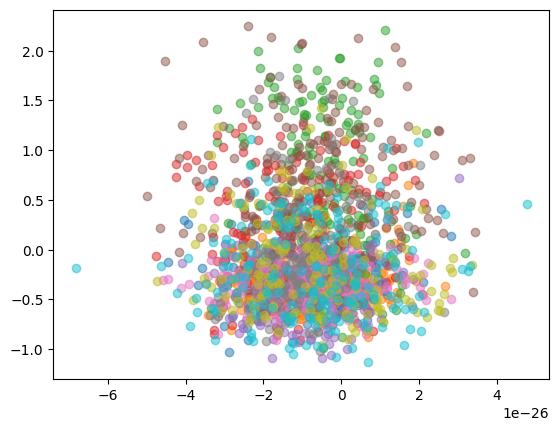

In [25]:
fig, ax = plt.subplots()
numberIdentify = load_digits().target
for i in range(10):
    x = []
    y = []
    for j in range(len(numberIdentify)):
       if (i == numberIdentify[j]):
            x.append ( reconstructed_data[j][0])
            y.append ( reconstructed_data[j][1])
    ax.scatter ( x, y, alpha=0.5)
plt.show()


### Q6. [Bonus] Plot the reconstructed data for the first 10 images and compare the reconstructed data with the original data. Comment on the quality of the reconstructed images. 

Reconstructed data followed by original data


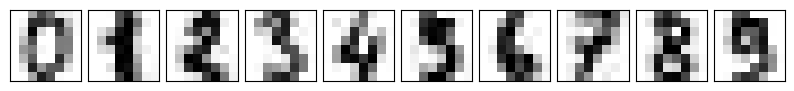

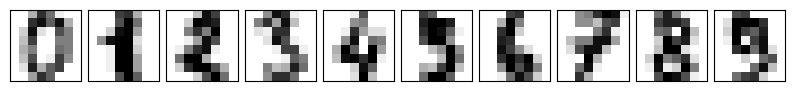

In [26]:
def plotTopTen(data):
    fig, axes = plt.subplots(1, 10, figsize=(10, 1), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
print("Reconstructed data followed by original data")
plotTopTen(reconstructed_data)
plotTopTen(original_data)


##### The reconstructed image appears to be very similar to the original image retrieved from the sklearn dataset. 
##### - As 95% of the principal components are conserved, the reconstructed images still ressemble the original images to a major extent.
##### - Top 29 of the 64 principal components are retained. 
##### - On close observation, one can notice some minor differences. The pixel at the 5th row and 5th column of the zero has lower intensity whereas a difference in shades can be noticed for the original pixel when compared to the pixel right above it. This is not the case for the reconstructed image of 0. The pixel at the last row and 3rd column of the number 7 also seems to have lost some intensity in comparision to the original image.
##### - One can notice a slight decrease in both intensity of the pixels as well as contraast of the whole picture. 
##### - The image as a whole still looks almost similar to the unaware eye, leading us to conclude that the recontructed data is really able to retain 95% of the information from the original one!